> SVM Trial one: 0.7719682328792247 (Saturday 12th Sept, 2020 08:00 PM)
<br/>
> XGBoost Trial one: 0.7808600059 (Saturday 12th Sept, 2020 08:04 PM)
<br/>
> Max Voting Trial one: 0.7804182179576894 (Saturday 12th Sept, 2020 08:04 PM)

In [300]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

from sklearn.svm import SVR
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Declaration
import warnings
warnings.filterwarnings('ignore')
%precision 2
%matplotlib inline
seabornInstance.set(font_scale=1)

In [337]:
# to see all the comands result in a single kernal 
%load_ext autoreload
%autoreload 2
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [301]:
ldf_training_dataset = pd.read_csv("data/train.csv")

In [302]:
print("Total data points: "+str(len(ldf_training_dataset.Response)))

Total data points: 381109


In [303]:
ldf_training_dataset.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [304]:
ldf_training_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
id                      381109 non-null int64
Gender                  381109 non-null object
Age                     381109 non-null int64
Driving_License         381109 non-null int64
Region_Code             381109 non-null float64
Previously_Insured      381109 non-null int64
Vehicle_Age             381109 non-null object
Vehicle_Damage          381109 non-null object
Annual_Premium          381109 non-null float64
Policy_Sales_Channel    381109 non-null float64
Vintage                 381109 non-null int64
Response                381109 non-null int64
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [305]:
ldf_training_dataset.Response.value_counts().to_frame("_count")

,_count
0,334399
1,46710


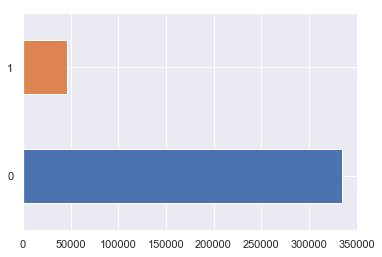

In [306]:
ldf_training_dataset.Response.value_counts().plot(kind="barh")

In [307]:
le = LabelEncoder()
ldf_training_dataset['Gender'] = le.fit_transform(ldf_training_dataset['Gender'])
ldf_training_dataset['Vehicle_Age'] = le.fit_transform(ldf_training_dataset['Vehicle_Age'])
ldf_training_dataset['Vehicle_Damage'] = le.fit_transform(ldf_training_dataset['Vehicle_Damage'])

In [308]:
ldf_training_dataset.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,0,0,33536.0,26.0,183,0
2,3,1,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,4,1,21,1,11.0,1,1,0,28619.0,152.0,203,0
4,5,0,29,1,41.0,1,1,0,27496.0,152.0,39,0


In [309]:
ldf_training_dataset["Previously_Insured"] = ldf_training_dataset["Previously_Insured"].apply(lambda x: 1 if x==0 else 0)

In [310]:
ldf_training_dataset.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,1,2,1,40454.0,26.0,217,1
1,2,1,76,1,3.0,1,0,0,33536.0,26.0,183,0
2,3,1,47,1,28.0,1,2,1,38294.0,26.0,27,1
3,4,1,21,1,11.0,0,1,0,28619.0,152.0,203,0
4,5,0,29,1,41.0,0,1,0,27496.0,152.0,39,0


Text(0.5, 0, 'Age')

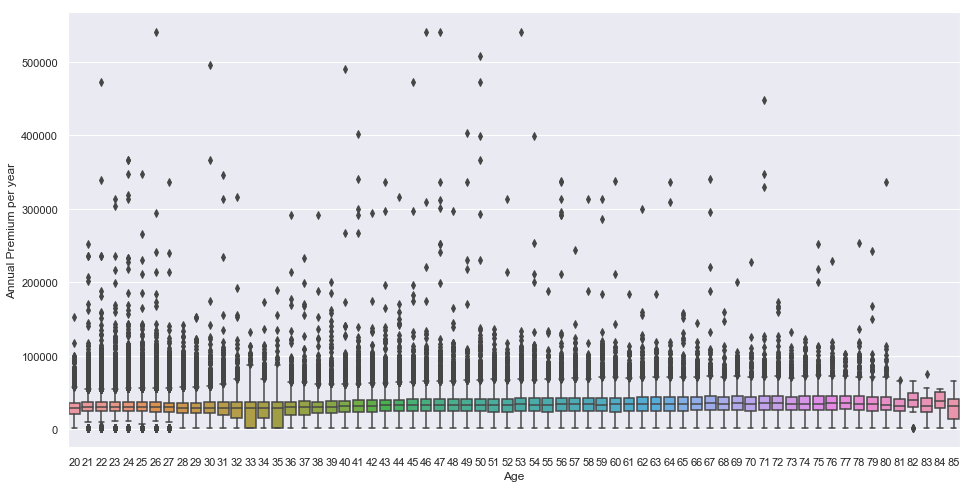

In [311]:
fig, ax = plt.subplots(figsize=(16,8))
seabornInstance.boxplot(ldf_training_dataset['Age'], ldf_training_dataset['Annual_Premium'])
ax.set_ylabel('Annual Premium per year')
ax.set_xlabel('Age')

In [312]:
Q1 = ldf_training_dataset.Annual_Premium.quantile(0.25)
Q3 = ldf_training_dataset.Annual_Premium.quantile(0.75)
IQR = Q3 - Q1
print("Annual Premium greater than "+str(IQR)+" considered as an outlier value")

Annual Premium greater than 14995.0 considered as an outlier value


In [313]:
ldf_training_dataset = ldf_training_dataset[~((ldf_training_dataset.Annual_Premium < (Q1 - 1.5 * IQR)) |(ldf_training_dataset.Annual_Premium > (Q3 + 1.5 * IQR)))]
ldf_training_dataset.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,1,2,1,40454.0,26.0,217,1
1,2,1,76,1,3.0,1,0,0,33536.0,26.0,183,0
2,3,1,47,1,28.0,1,2,1,38294.0,26.0,27,1
3,4,1,21,1,11.0,0,1,0,28619.0,152.0,203,0
4,5,0,29,1,41.0,0,1,0,27496.0,152.0,39,0


Text(0.5, 0, 'Age')

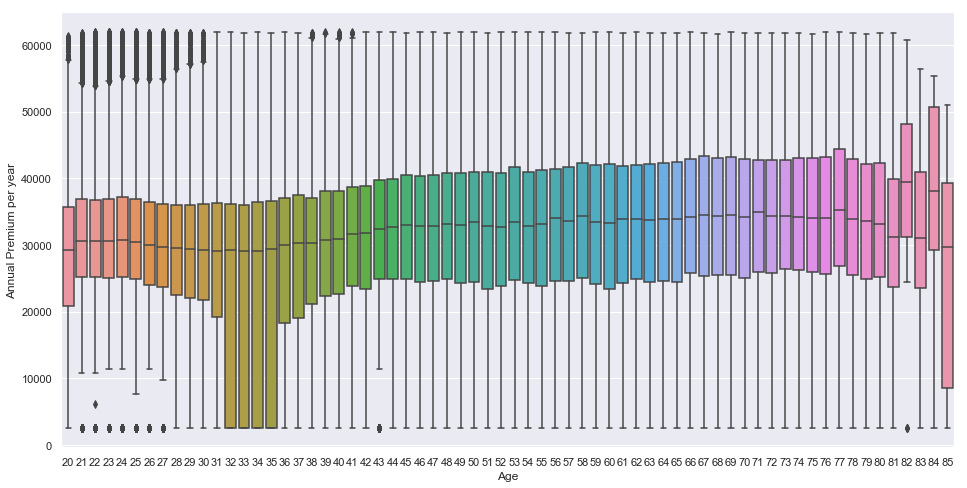

In [314]:
fig, ax = plt.subplots(figsize=(16,8))
seabornInstance.boxplot(ldf_training_dataset['Age'], ldf_training_dataset['Annual_Premium'])
ax.set_ylabel('Annual Premium per year')
ax.set_xlabel('Age')

In [315]:
ldf_training_dataset.Response.value_counts()

0    325634
1     45155
Name: Response, dtype: int64

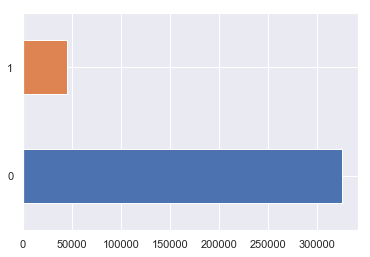

In [316]:
ldf_training_dataset.Response.value_counts().plot(kind="barh")

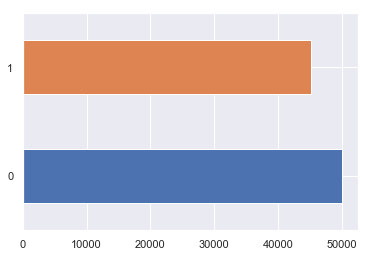

In [317]:
ldf_training_dataset = ldf_training_dataset.groupby('Response', group_keys=False).apply(lambda x: x.sample(min(len(x), 50000)))
ldf_training_dataset = ldf_training_dataset.reset_index(drop=True)
ldf_training_dataset['Response'].value_counts().plot(kind="barh")

In [334]:
ldf_training_dataset_shortlisted = ldf_training_dataset[["Gender","Age","Driving_License", "Previously_Insured", "Policy_Sales_Channel",
                                                         "Vehicle_Age", "Region_Code", "Vehicle_Damage", "Response"]]

In [335]:
ldf_training_dataset_shortlisted.head()

,Gender,Age,Driving_License,Previously_Insured,Policy_Sales_Channel,Vehicle_Age,Region_Code,Vehicle_Damage,Response
0,0,25,1,1,152.0,1,36.0,0,0
1,1,55,1,0,124.0,0,8.0,0,0
2,0,49,1,0,124.0,0,37.0,0,0
3,1,64,1,0,26.0,0,28.0,0,0
4,0,32,1,0,152.0,1,28.0,0,0


In [338]:
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

y = ldf_training_dataset_shortlisted[['Response']]
X = ldf_training_dataset_shortlisted.drop(["Response"], axis =1)

cat_col=['Gender','Driving_License', "Region_Code", 'Previously_Insured', 'Vehicle_Damage']

X_t, X_tt, y_t, y_tt = train_test_split(X, y, test_size=.25, random_state=2)

lgbcl = LGBMClassifier(n_estimators=52)
lgbcl= lgbcl.fit(X_t, y_t,eval_metric='auc',eval_set=(X_tt , y_tt),verbose=2,categorical_feature=cat_col)
y_lgb = lgbcl.predict(X_tt)
probs_tr = lgbcl.predict_proba(X_t)[:, 1]
probs_te = lgbcl.predict_proba(X_tt)[:, 1]
roc_auc_score(y_t, probs_tr)
roc_auc_score(y_tt, probs_te)

[2]	valid_0's auc: 0.851348	valid_0's binary_logloss: 0.618283
[4]	valid_0's auc: 0.851629	valid_0's binary_logloss: 0.568327
[6]	valid_0's auc: 0.851802	valid_0's binary_logloss: 0.532823
[8]	valid_0's auc: 0.852203	valid_0's binary_logloss: 0.506716
[10]	valid_0's auc: 0.852302	valid_0's binary_logloss: 0.487626
[12]	valid_0's auc: 0.853073	valid_0's binary_logloss: 0.473032
[14]	valid_0's auc: 0.853439	valid_0's binary_logloss: 0.462024
[16]	valid_0's auc: 0.854042	valid_0's binary_logloss: 0.453443
[18]	valid_0's auc: 0.854343	valid_0's binary_logloss: 0.446977
[20]	valid_0's auc: 0.854543	valid_0's binary_logloss: 0.441876
[22]	valid_0's auc: 0.854725	valid_0's binary_logloss: 0.437999
[24]	valid_0's auc: 0.854979	valid_0's binary_logloss: 0.434914
[26]	valid_0's auc: 0.854991	valid_0's binary_logloss: 0.432568
[28]	valid_0's auc: 0.855141	valid_0's binary_logloss: 0.430678
[30]	valid_0's auc: 0.85533	valid_0's binary_logloss: 0.429114
[32]	valid_0's auc: 0.855362	valid_0's binary

0.8671281197086034

0.8555751928205185

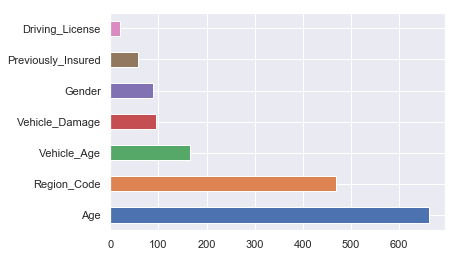

In [333]:
feat_importances = pd.Series(lgbcl.feature_importances_, index=X_t.columns)
feat_importances.nlargest(15).plot(kind='barh')
#feat_importances.nsmallest(20).plot(kind='barh')
plt.show()

In [272]:
llst_dummies_columns = ["Gender","Driving_License", "Vehicle_Damage", "Previously_Insured"]
ldf_training_dataset_shortlisted = pd.get_dummies(data=ldf_training_dataset_shortlisted, prefix=llst_dummies_columns, columns = llst_dummies_columns, drop_first=True)

In [273]:
ldf_training_dataset_shortlisted.head()

,Age,Response,Gender_1,Driving_License_1,Vehicle_Damage_1,Previously_Insured_1
0,25,0,0,1,1,1
1,53,0,1,1,0,0
2,26,0,0,1,0,0
3,26,0,0,1,0,0
4,26,0,0,1,0,0


In [274]:
ldf_training_dataset_shortlisted.corr()

,Age,Response,Gender_1,Driving_License_1,Vehicle_Damage_1,Previously_Insured_1
Age,1.000000,0.183493,0.128626,-0.070139,0.269112,0.258539
Response,0.183493,1.000000,0.078432,0.018825,0.585464,0.579317
Gender_1,0.128626,0.078432,1.000000,-0.012746,0.095475,0.086944
Driving_License_1,-0.070139,0.018825,-0.012746,1.000000,-0.003002,-0.002106
Vehicle_Damage_1,0.269112,0.585464,0.095475,-0.003002,1.000000,0.852968
Previously_Insured_1,0.258539,0.579317,0.086944,-0.002106,0.852968,1.000000


<hr><br/>

## Model Selection and Training

In [275]:
y = ldf_training_dataset_shortlisted[['Response']]
X = ldf_training_dataset_shortlisted.drop(["Response"], axis =1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=123, shuffle=True)

In [276]:
from sklearn.linear_model import SGDClassifier
svm_clf = Pipeline([
    ('clf',SGDClassifier(
        loss='modified_huber',
        penalty='l2',
        alpha=1e-3,
        random_state=42,
        max_iter=5,
        tol=None
    ))
])

xgboost_clg = Pipeline([
    ('classifier', XGBClassifier(learning_rate=0.01))
])

gradient_boosting_clf = Pipeline([
    ('classifier', GradientBoostingClassifier(learning_rate=0.01,random_state=1))
])

rnd_forest_clf = RandomForestClassifier(n_estimators=50, random_state=1)

max_voting_clf = VotingClassifier(estimators=[('svm', svm_clf),
                                              ('xgboost', xgboost_clg), 
                                              ('gnb', gradient_boosting_clf),
                                              ('randomForest',rnd_forest_clf)], 
                                  voting='soft', weights=[1,1,2,1])

In [277]:
svm_model = svm_clf.fit(X_train, y_train)
xg_boost_model = xgboost_clg.fit(X_train, y_train)
gradient_boosting_model = gradient_boosting_clf.fit(X_train, y_train)
rnd_forest_model = rnd_forest_clf.fit(X_train, y_train)
max_voting_model = max_voting_clf.fit(X_train, y_train)

In [278]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix

svm_y_pred = svm_model.predict(X_test)
xgb_y_pred = xg_boost_model.predict(X_test)
grad_b_y_pred = gradient_boosting_model.predict(X_test)
rnd_forest_y_pred = rnd_forest_model.predict(X_test)
max_voting_y_pred = max_voting_model.predict(X_test)

print('SVM Accuracy', str(metrics.accuracy_score(svm_y_pred,y_test)))
print('SVM Balanced Accuracy', str(metrics.balanced_accuracy_score(svm_y_pred,y_test)),"\n")

print('XGBoost Accuracy', str(metrics.accuracy_score(xgb_y_pred,y_test)))
print('XGBoost Balanced Accuracy', str(metrics.balanced_accuracy_score(xgb_y_pred,y_test)),"\n")

print('GradBoost Accuracy', str(metrics.accuracy_score(grad_b_y_pred,y_test)))
print('GradBoost Balanced Accuracy', str(metrics.balanced_accuracy_score(grad_b_y_pred,y_test)),"\n")

print('RandomForrest Accuracy', str(metrics.accuracy_score(rnd_forest_y_pred,y_test)))
print('RandomForrest Balanced Accuracy', str(metrics.balanced_accuracy_score(rnd_forest_y_pred,y_test)),"\n")

print('MaxVoting Accuracy', str(metrics.accuracy_score(max_voting_y_pred,y_test)))
print('MaxVoting Balanced Accuracy', str(metrics.balanced_accuracy_score(max_voting_y_pred,y_test)))

SVM Accuracy 0.7711102937312806
SVM Balanced Accuracy 0.8220050287594234 

XGBoost Accuracy 0.7848247596027534
XGBoost Balanced Accuracy 0.8052163988383642 

GradBoost Accuracy 0.7821449214439599
GradBoost Balanced Accuracy 0.8018613423054683 

RandomForrest Accuracy 0.784246755293994
RandomForrest Balanced Accuracy 0.8036187143790515 

MaxVoting Accuracy 0.775261415585098
MaxVoting Balanced Accuracy 0.8225880926282321


In [279]:
print(classification_report(y_test,svm_y_pred))

              precision    recall  f1-score   support

           0       0.96      0.59      0.73     10000
           1       0.68      0.98      0.80      9031

   micro avg       0.77      0.77      0.77     19031
   macro avg       0.82      0.78      0.77     19031
weighted avg       0.83      0.77      0.76     19031



In [280]:
print(classification_report(y_test,xgb_y_pred))

              precision    recall  f1-score   support

           0       0.90      0.67      0.76     10000
           1       0.71      0.92      0.80      9031

   micro avg       0.78      0.78      0.78     19031
   macro avg       0.81      0.79      0.78     19031
weighted avg       0.81      0.78      0.78     19031



In [281]:
print(classification_report(y_test,grad_b_y_pred))

              precision    recall  f1-score   support

           0       0.89      0.67      0.76     10000
           1       0.71      0.91      0.80      9031

   micro avg       0.78      0.78      0.78     19031
   macro avg       0.80      0.79      0.78     19031
weighted avg       0.81      0.78      0.78     19031



In [282]:
print(classification_report(y_test,rnd_forest_y_pred))

              precision    recall  f1-score   support

           0       0.89      0.67      0.77     10000
           1       0.71      0.91      0.80      9031

   micro avg       0.78      0.78      0.78     19031
   macro avg       0.80      0.79      0.78     19031
weighted avg       0.81      0.78      0.78     19031



In [283]:
print(classification_report(y_test,max_voting_y_pred))

              precision    recall  f1-score   support

           0       0.96      0.60      0.74     10000
           1       0.69      0.97      0.80      9031

   micro avg       0.78      0.78      0.78     19031
   macro avg       0.82      0.78      0.77     19031
weighted avg       0.83      0.78      0.77     19031



In [284]:
from sklearn.metrics import roc_auc_score
print("SVM",roc_auc_score(y_test,svm_y_pred))
print("XGBoost",roc_auc_score(y_test,xgb_y_pred))
print("GradBoost",roc_auc_score(y_test,grad_b_y_pred))
print("Random Forest",roc_auc_score(y_test,rnd_forest_y_pred))
print("Max Voting",roc_auc_score(y_test,max_voting_y_pred))

SVM 0.7810036374709335
XGBoost 0.7911834403720518
GradBoost 0.7884134813420441
Random Forest 0.7904510353227772
Max Voting 0.7847980566936108


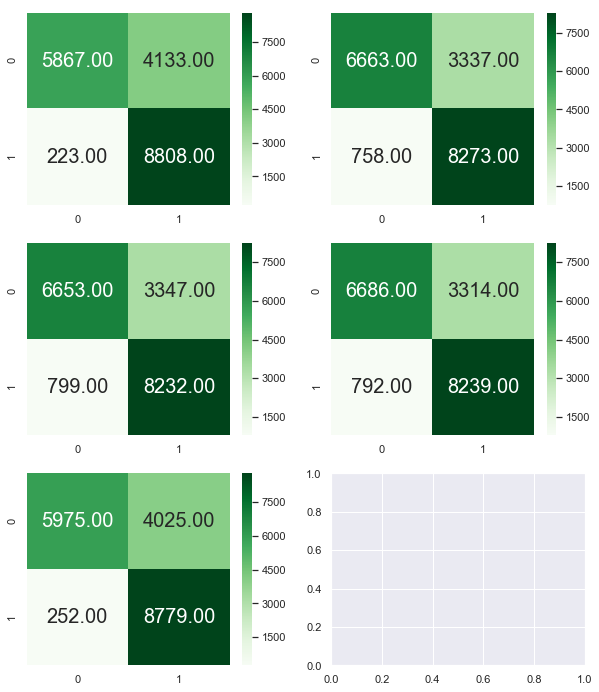

In [285]:
llst_all_model_accuracy = [
                           [[svm_y_pred,y_test],[xgb_y_pred,y_test]],
                           [[grad_b_y_pred,y_test],[rnd_forest_y_pred,y_test]],
                           [[max_voting_y_pred,y_test]]
                         ]

from sklearn.metrics import confusion_matrix
#create subplot figure with having two side by side plots
fig, axes = plt.subplots(nrows=len(llst_all_model_accuracy),ncols=2,figsize=(10,12))

lint_global_idx = 0
for i, llst_all_train_test_accuracies in enumerate(llst_all_model_accuracy):
    for j, llst_all_train_test_accuracy in enumerate(llst_all_train_test_accuracies):
        cm = confusion_matrix(llst_all_train_test_accuracy[1], llst_all_train_test_accuracy[0], 
                              labels=[0,1])
        df_cm = pd.DataFrame(cm, index = [0,1],
                  columns = [0,1])
#         cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#         df_cm = pd.DataFrame(cmn, index=df_cm.index, columns=df_cm.columns)
        seabornInstance.heatmap(df_cm, annot=True, fmt='.2f', annot_kws={"size": 20}, 
                                cmap = 'Greens', 
                                ax=axes.flat[lint_global_idx])
#         plt.savefig("svm_"+str(lint_global_idx)+".jpg")
        lint_global_idx = lint_global_idx+1

In [126]:
from sklearn import model_selection
kfold = model_selection.KFold(n_splits=10, random_state=7)

In [1]:
result_lsvm = model_selection.cross_val_score(svm_model, X_train, y_train, cv=kfold, scoring="accuracy")
result_xgb = model_selection.cross_val_score(xg_boost_model, X_train, y_train, cv=kfold, scoring="accuracy")
result_grad_b = model_selection.cross_val_score(gradient_boosting_model, X_train, y_train, cv=kfold, scoring="accuracy")
result_random_forest = model_selection.cross_val_score(rnd_forest_model, X_train, y_train, cv=kfold, scoring="accuracy")
result_max_voting = model_selection.cross_val_score(max_voting_model, X_train, y_train, cv=kfold, scoring="accuracy")

In [140]:
print(result_lsvm.mean(),result_lsvm.std())
print(result_xgb.mean(),result_xgb.std())
print(result_grad_b.mean(),result_grad_b.std())
print(result_random_forest.mean(),result_random_forest.std())
print(result_max_voting.mean(),result_max_voting.std())

0.5780658191843349 0.10013832839164165
0.7879249229285941 0.003557688735151186
0.7842204221158611 0.003552574936661385
0.7879774732616769 0.003363826172093125
0.770821065606795 0.0067993073162300405


<br/><hr/>

### Make Predictions

In [292]:
ldf_testing_dataset = pd.read_csv("data/test.csv")
ldf_testing_dataset['Gender'] = le.fit_transform(ldf_testing_dataset['Gender'])
ldf_testing_dataset['Vehicle_Damage'] = le.fit_transform(ldf_testing_dataset['Vehicle_Damage'])

In [293]:
ldf_testing_dataset["Previously_Insured"] = ldf_testing_dataset["Previously_Insured"].apply(lambda x: 1 if x==0 else 0)

In [294]:
ldf_testing_dataset_shortlisted = ldf_testing_dataset[["Gender","Age","Driving_License", "Vehicle_Damage", "Previously_Insured"]]

In [295]:
ldf_testing_dataset_shortlisted.head()

,Gender,Age,Driving_License,Vehicle_Damage,Previously_Insured
0,1,25,1,0,0
1,1,40,1,1,1
2,1,47,1,1,1
3,1,24,1,1,0
4,1,27,1,0,0


In [296]:
llst_dummies_columns = ["Gender","Driving_License", "Vehicle_Damage", "Previously_Insured"]
ldf_testing_dataset_shortlisted = pd.get_dummies(data=ldf_testing_dataset_shortlisted, prefix=llst_dummies_columns, columns = llst_dummies_columns, drop_first=True)

In [297]:
svm_response = svm_model.predict(ldf_testing_dataset_shortlisted)
xg_boost_response = xg_boost_model.predict(ldf_testing_dataset_shortlisted)
gradient_boosting_response = gradient_boosting_model.predict(ldf_testing_dataset_shortlisted)
random_forest_response = rnd_forest_model.predict(ldf_testing_dataset_shortlisted)
max_voting_response = max_voting_model.predict(ldf_testing_dataset_shortlisted)

In [298]:
ldf_testing_dataset_svm = ldf_testing_dataset
ldf_testing_dataset_svm["Response"] = svm_response

ldf_testing_dataset_xb = ldf_testing_dataset
ldf_testing_dataset_xb["Response"] = xg_boost_response

ldf_testing_dataset_grad = ldf_testing_dataset
ldf_testing_dataset_grad["Response"] = gradient_boosting_response

ldf_testing_dataset_rf = ldf_testing_dataset
ldf_testing_dataset_rf["Response"] = random_forest_response

ldf_testing_dataset_max_voting = ldf_testing_dataset
ldf_testing_dataset_max_voting["Response"] = max_voting_response

In [299]:
ldf_testing_dataset_svm = ldf_testing_dataset_svm[["id","Response"]].reset_index(drop=True)
ldf_testing_dataset_xb = ldf_testing_dataset_xb[["id","Response"]].reset_index(drop=True)
ldf_testing_dataset_grad = ldf_testing_dataset_grad[["id","Response"]].reset_index(drop=True)
ldf_testing_dataset_rf = ldf_testing_dataset_rf[["id","Response"]].reset_index(drop=True)
ldf_testing_dataset_max_voting = ldf_testing_dataset_max_voting[["id","Response"]].reset_index(drop=True)

ldf_testing_dataset_svm.to_csv('data/prediction/svm_pred.csv', index=False)
ldf_testing_dataset_xb.to_csv('data/prediction/xgb_pred.csv', index=False)
ldf_testing_dataset_grad.to_csv('data/prediction/grad_pred.csv', index=False)
ldf_testing_dataset_rf.to_csv('data/prediction/random_forest.csv', index=False)
ldf_testing_dataset_max_voting.to_csv('data/prediction/max_voting.csv', index=False)